# CLASSIFICATION

## Problem Definition
- Predict whether there will be rainfall tomorrow or not

### IMPORT REQUIRED PACKAGES

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### GET THE DATA

In [2]:
# Read weather data from the "weather.csv" file and store it in the 'df' DataFrame.
df = pd.read_csv("weather.csv")

### DATA EXPLORATION

In [3]:
# Display summary information about the DataFrame 'df', including data types and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226868 entries, 0 to 226867
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           226868 non-null  object 
 1   Location       226868 non-null  object 
 2   MinTemp        223068 non-null  float64
 3   MaxTemp        223238 non-null  float64
 4   Rainfall       220093 non-null  float64
 5   Evaporation    103612 non-null  float64
 6   Sunshine       94231 non-null   float64
 7   WindGustDir    209959 non-null  object 
 8   WindGustSpeed  210068 non-null  float64
 9   WindDir9am     209309 non-null  object 
 10  WindDir3pm     217154 non-null  object 
 11  WindSpeed9am   222435 non-null  float64
 12  WindSpeed3pm   218678 non-null  float64
 13  Humidity9am    221584 non-null  float64
 14  Humidity3pm    217333 non-null  float64
 15  Pressure9am    201792 non-null  float64
 16  Pressure3pm    201813 non-null  float64
 17  Cloud9am       127751 non-nul

In [4]:
# Set Pandas display option to show all columns when printing DataFrames.
pd.set_option('display.max_columns', None)

In [5]:
# Display the first 10 rows of the DataFrame 'df' to get an initial view of the data.
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   
5         WNW           56.0          W          W          19.0   
6           W           50.0         SW          W          20.0   
7           W           35.0        SSE          W           6.0   
8         NNW           80.0         SE         NW           7.0   
9           W           28.0          S        SSE          15.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   
5          24.0         55.0         23.0       1009.2       1005.4       NaN   
6          24.0         49.0         19.0       1009.6       1008.2       1.0   
7          17.0         48.0         19.0       1013.4       1010.1       NaN   
8          28.0         42.0          9.0       1008.9       1003.6       NaN   
9          11.0         58.0         27.0       1007.0       1005.7       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
0       NaN     16.9     21.8        No      0.0           No  
1       NaN     17.2     24.3        No      0.0           No  
2       2.0     21.0     23.2        No      0.0           No  
3       NaN     18.1     26.5        No      1.0           No  
4       8.0     17.8     29.7        No      0.2           No  
5       NaN     20.6     28.9        No      0.0           No  
6       NaN     18.1     24.6        No      0.0           No  
7       NaN     16.3     25.5        No      0.0           No  
8       NaN     18.3     30.2        No      1.4          Yes  
9       NaN     20.1     28.2       Yes      0.0           No

In [6]:
# Count of missing values in each column of the DataFrame.
df.isna().sum()

Date                  0
Location              0
MinTemp            3800
MaxTemp            3630
Rainfall           6775
Evaporation      123256
Sunshine         132637
WindGustDir       16909
WindGustSpeed     16800
WindDir9am        17559
WindDir3pm         9714
WindSpeed9am       4433
WindSpeed3pm       8190
Humidity9am        5284
Humidity3pm        9535
Pressure9am       25076
Pressure3pm       25055
Cloud9am          99117
Cloud3pm         104807
Temp9am            3867
Temp3pm            8211
RainToday          6775
RISK_MM            6774
RainTomorrow       6774
dtype: int64

In [7]:
# Percentage of missing values in each column of the DataFrame.
df.isna().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.674983
MaxTemp           1.600049
Rainfall          2.986318
Evaporation      54.329390
Sunshine         58.464393
WindGustDir       7.453233
WindGustSpeed     7.405187
WindDir9am        7.739743
WindDir3pm        4.281785
WindSpeed9am      1.954000
WindSpeed3pm      3.610029
Humidity9am       2.329108
Humidity3pm       4.202884
Pressure9am      11.053123
Pressure3pm      11.043867
Cloud9am         43.689282
Cloud3pm         46.197348
Temp9am           1.704515
Temp3pm           3.619285
RainToday         2.986318
RISK_MM           2.985877
RainTomorrow      2.985877
dtype: float64

In [8]:
# Identify Categorical and Numerical Values Based on their data types
categorical_variables = [column for column in df.columns if df[column].dtype == object]
numerical_variables = [variable for variable in df.columns if variable not in categorical_variables]

In [9]:
df.dropna(subset=['RainTomorrow', 'RainToday'], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217984 entries, 0 to 226867
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           217984 non-null  object 
 1   Location       217984 non-null  object 
 2   MinTemp        217139 non-null  float64
 3   MaxTemp        217258 non-null  float64
 4   Rainfall       217984 non-null  float64
 5   Evaporation    101766 non-null  float64
 6   Sunshine       92383 non-null   float64
 7   WindGustDir    203306 non-null  object 
 8   WindGustSpeed  203405 non-null  float64
 9   WindDir9am     201898 non-null  object 
 10  WindDir3pm     209280 non-null  object 
 11  WindSpeed9am   214656 non-null  float64
 12  WindSpeed3pm   210750 non-null  float64
 13  Humidity9am    215738 non-null  float64
 14  Humidity3pm    211387 non-null  float64
 15  Pressure9am    194700 non-null  float64
 16  Pressure3pm    194642 non-null  float64
 17  Cloud9am       125511 non-null  fl

In [11]:
# For binary representation convert 'Yes' to 1 and 'No' to 0 in the 'RainTomorrow' column.
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes':1,"No":0})

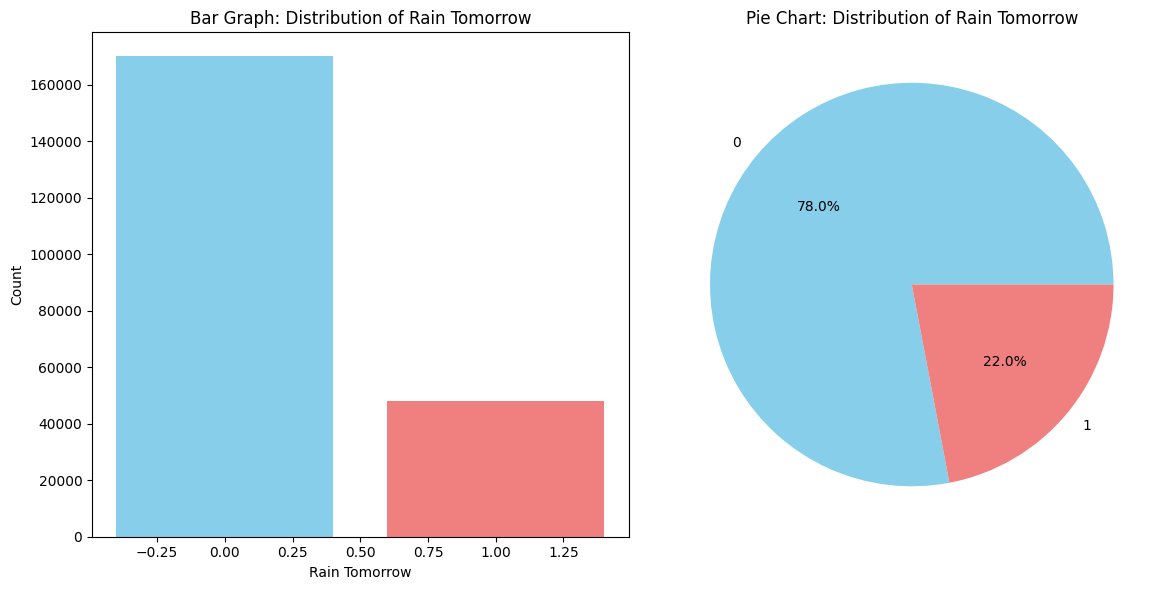

In [12]:
# Count the occurrences of each category in the "RainTomorrow" column
rain_tomorrow_counts = df['RainTomorrow'].value_counts()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a bar graph in the first subplot
axes[0].bar(rain_tomorrow_counts.index, rain_tomorrow_counts, color=['skyblue', 'lightcoral'])
axes[0].set_title('Bar Graph: Distribution of Rain Tomorrow')
axes[0].set_xlabel('Rain Tomorrow')
axes[0].set_ylabel('Count')

# Create a pie chart in the second subplot
axes[1].pie(rain_tomorrow_counts, labels=rain_tomorrow_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Pie Chart: Distribution of Rain Tomorrow')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### BALANCE THE TARGET COLUMN

In [15]:
# Create an instance of RandomOverSampler to balance the classes

X = df.drop('RainTomorrow', axis=1)
Y = df['RainTomorrow']
over_sampler = RandomOverSampler(random_state=1234)
X_over, Y_over = over_sampler.fit_resample(X, Y)

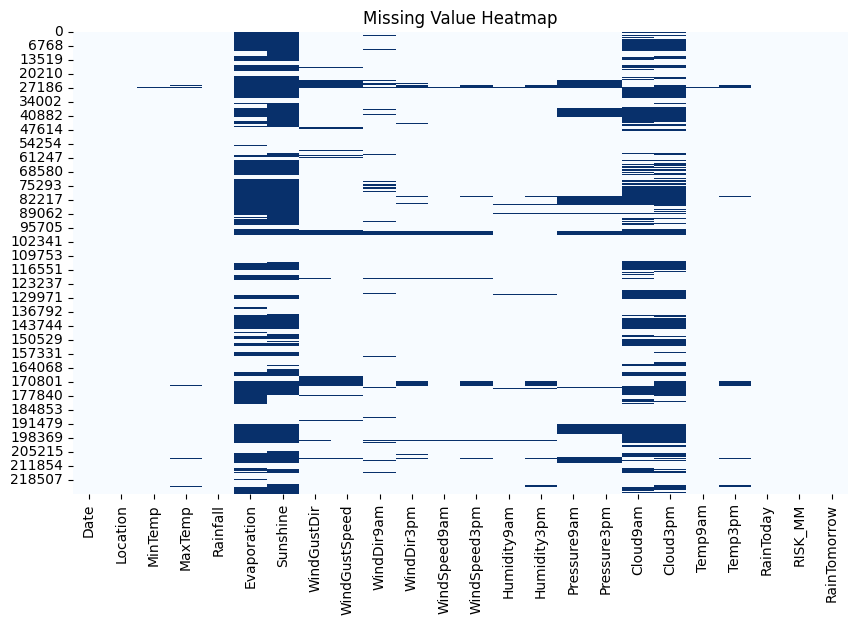

In [16]:
# Create a heatmap to visualize the distribution of missing values in the DataFrame.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Value Heatmap')
plt.show()

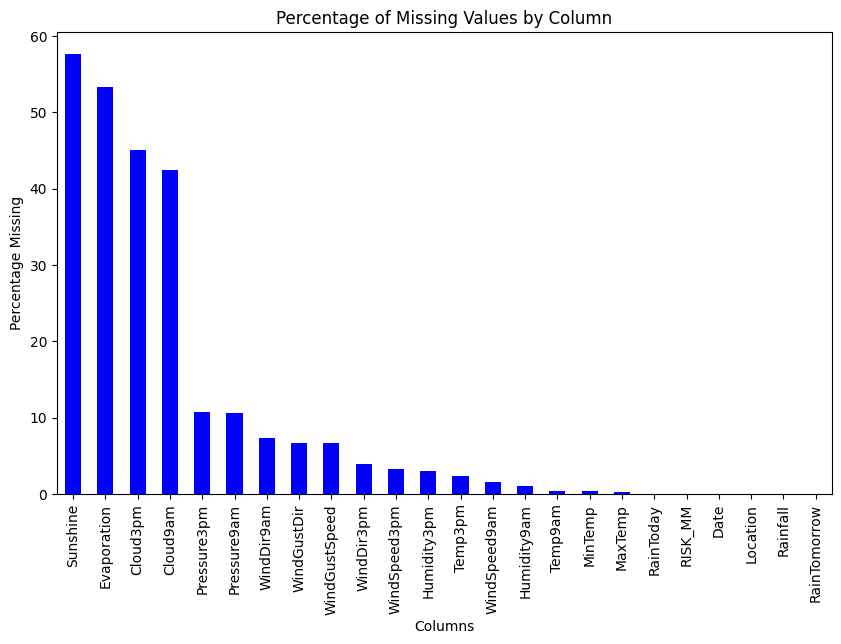

In [17]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot of missing values
plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.show()

### DATA CLEANING AND PREPROCESSING

In [18]:
categorical_variables_NA = []
for variable in categorical_variables:
    if df[variable].isnull().sum()!=0:
        categorical_variables_NA.append(variable)
    

In [19]:
# Create function to fill NA Values of categorical variables with Mode 
def fill_categorical_variables_mode(df,variables):
    mode = df[variables].mode().iloc[0]
    df[variables] = df[variables].fillna(mode)
    return df
fill_categorical_variables_mode(df,categorical_variables_NA)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
226863  2023-03-21    Uluru     26.5     38.9       0.0          NaN   
226864  2023-03-22    Uluru     25.1     39.1       0.0          NaN   
226865  2023-03-23    Uluru     23.2     39.8       0.0          NaN   
226866  2023-03-24    Uluru     22.5     39.8       0.0          NaN   
226867  2023-03-25    Uluru     24.2     39.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
226863       NaN          SE           43.0          E         NE   
226864       NaN         ENE           39.0        ESE        ESE   
226865       NaN         ENE           39.0          E         NE   
226866       NaN          NE           44.0        ENE          E   
226867       NaN         NNE           39.0         NE        ENE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
226863          28.0          11.0         34.0         16.0       1015.2   
226864          22.0          20.0         28.0         13.0       1014.1   
226865          20.0          11.0         26.0         12.0       1014.4   
226866          24.0          15.0         22.0         15.0       1015.1   
226867          20.0          13.0         18.0         10.0       1013.8   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  RISK_MM  \
0            1007.1       8.0       NaN     16.9     21.8        No      0.0   
1            1007.8       NaN       NaN     17.2     24.3        No      0.0   
2            1008.7       NaN       2.0     21.0     23.2        No      0.0   
3            1012.8       NaN       NaN     18.1     26.5        No      1.0   
4            1006.0       7.0       8.0     17.8     29.7        No      0.2   
...             ...       ...       ...      ...      ...       ...      ...   
226863       1011.6       NaN       1.0     30.2     37.4        No      0.0   
226864       1009.9       NaN       1.0     31.2     37.0        No      0.0   
226865       1010.4       NaN       NaN     30.0     38.5        No      0.0   
226866       1010.2       NaN       1.0     30.5     37.7        No      0.0   
226867       1009.3       NaN       NaN     30.7     37.9        No      0.0   

        RainTomorrow  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
226863             0  
226864             0  
226865             0  
226866             0  
226867             0  

[217984 rows x 24 columns]

In [20]:
for variable in categorical_variables:
    print(df[variable].isnull().sum())

0
0
0
0
0
0
0


In [21]:
# Use LabelEncoder to convert categorical variables into numerical representations.
encoder = LabelEncoder()
for variable in categorical_variables:
    df[variable] = encoder.fit_transform(df[variable])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217984 entries, 0 to 226867
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           217984 non-null  int64  
 1   Location       217984 non-null  int64  
 2   MinTemp        217139 non-null  float64
 3   MaxTemp        217258 non-null  float64
 4   Rainfall       217984 non-null  float64
 5   Evaporation    101766 non-null  float64
 6   Sunshine       92383 non-null   float64
 7   WindGustDir    217984 non-null  int64  
 8   WindGustSpeed  203405 non-null  float64
 9   WindDir9am     217984 non-null  int64  
 10  WindDir3pm     217984 non-null  int64  
 11  WindSpeed9am   214656 non-null  float64
 12  WindSpeed3pm   210750 non-null  float64
 13  Humidity9am    215738 non-null  float64
 14  Humidity3pm    211387 non-null  float64
 15  Pressure9am    194700 non-null  float64
 16  Pressure3pm    194642 non-null  float64
 17  Cloud9am       125511 non-null  fl

In [23]:
df.head(10)

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   396         2     13.4     22.9       0.6          NaN       NaN   
1   397         2      7.4     25.1       0.0          NaN       NaN   
2   398         2     12.9     25.7       0.0          NaN       NaN   
3   399         2      9.2     28.0       0.0          NaN       NaN   
4   400         2     17.5     32.3       1.0          NaN       NaN   
5   401         2     14.6     29.7       0.2          NaN       NaN   
6   402         2     14.3     25.0       0.0          NaN       NaN   
7   403         2      7.7     26.7       0.0          NaN       NaN   
8   404         2      9.7     31.9       0.0          NaN       NaN   
9   405         2     13.1     30.1       1.4          NaN       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0           13           44.0          13          14          20.0   
1           14           44.0           6          15           4.0   
2           15           46.0          13          15          19.0   
3            4           24.0           9           0          11.0   
4           13           41.0           1           7           7.0   
5           14           56.0          13          13          19.0   
6           13           50.0          12          13          20.0   
7           13           35.0          10          13           6.0   
8            6           80.0           9           7           7.0   
9           13           28.0           8          10          15.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   
5          24.0         55.0         23.0       1009.2       1005.4       NaN   
6          24.0         49.0         19.0       1009.6       1008.2       1.0   
7          17.0         48.0         19.0       1013.4       1010.1       NaN   
8          28.0         42.0          9.0       1008.9       1003.6       NaN   
9          11.0         58.0         27.0       1007.0       1005.7       NaN   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0       NaN     16.9     21.8          0      0.0             0  
1       NaN     17.2     24.3          0      0.0             0  
2       2.0     21.0     23.2          0      0.0             0  
3       NaN     18.1     26.5          0      1.0             0  
4       8.0     17.8     29.7          0      0.2             0  
5       NaN     20.6     28.9          0      0.0             0  
6       NaN     18.1     24.6          0      0.0             0  
7       NaN     16.3     25.5          0      0.0             0  
8       NaN     18.3     30.2          0      1.4             1  
9       NaN     20.1     28.2          1      0.0             0

### Multiple Imputation by Chained Equations

In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
final_df = df.copy(deep=True) 
mice_imputer = IterativeImputer()
final_df.iloc[:, :] = mice_imputer.fit_transform(df)

In [25]:
final_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [26]:
final_df.head(5)

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
0   396         2     13.4     22.9       0.6     6.125419   7.237456   
1   397         2      7.4     25.1       0.0     5.868283  11.225746   
2   398         2     12.9     25.7       0.0     8.196656  11.988289   
3   399         2      9.2     28.0       0.0     6.145708  11.740601   
4   400         2     17.5     32.3       1.0     7.039759   5.975170   

   WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0           13           44.0          13          14          20.0   
1           14           44.0           6          15           4.0   
2           15           46.0          13          15          19.0   
3            4           24.0           9           0          11.0   
4           13           41.0           1           7           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1  8.000000   
1          22.0         44.0         25.0       1010.6       1007.8  1.767985   
2          26.0         38.0         30.0       1007.6       1008.7  1.833829   
3           9.0         45.0         16.0       1017.6       1012.8  1.012341   
4          20.0         82.0         33.0       1010.8       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  
0  5.060714     16.9     21.8          0      0.0             0  
1  2.548625     17.2     24.3          0      0.0             0  
2  2.000000     21.0     23.2          0      0.0             0  
3  1.908119     18.1     26.5          0      1.0             0  
4  8.000000     17.8     29.7          0      0.2             0

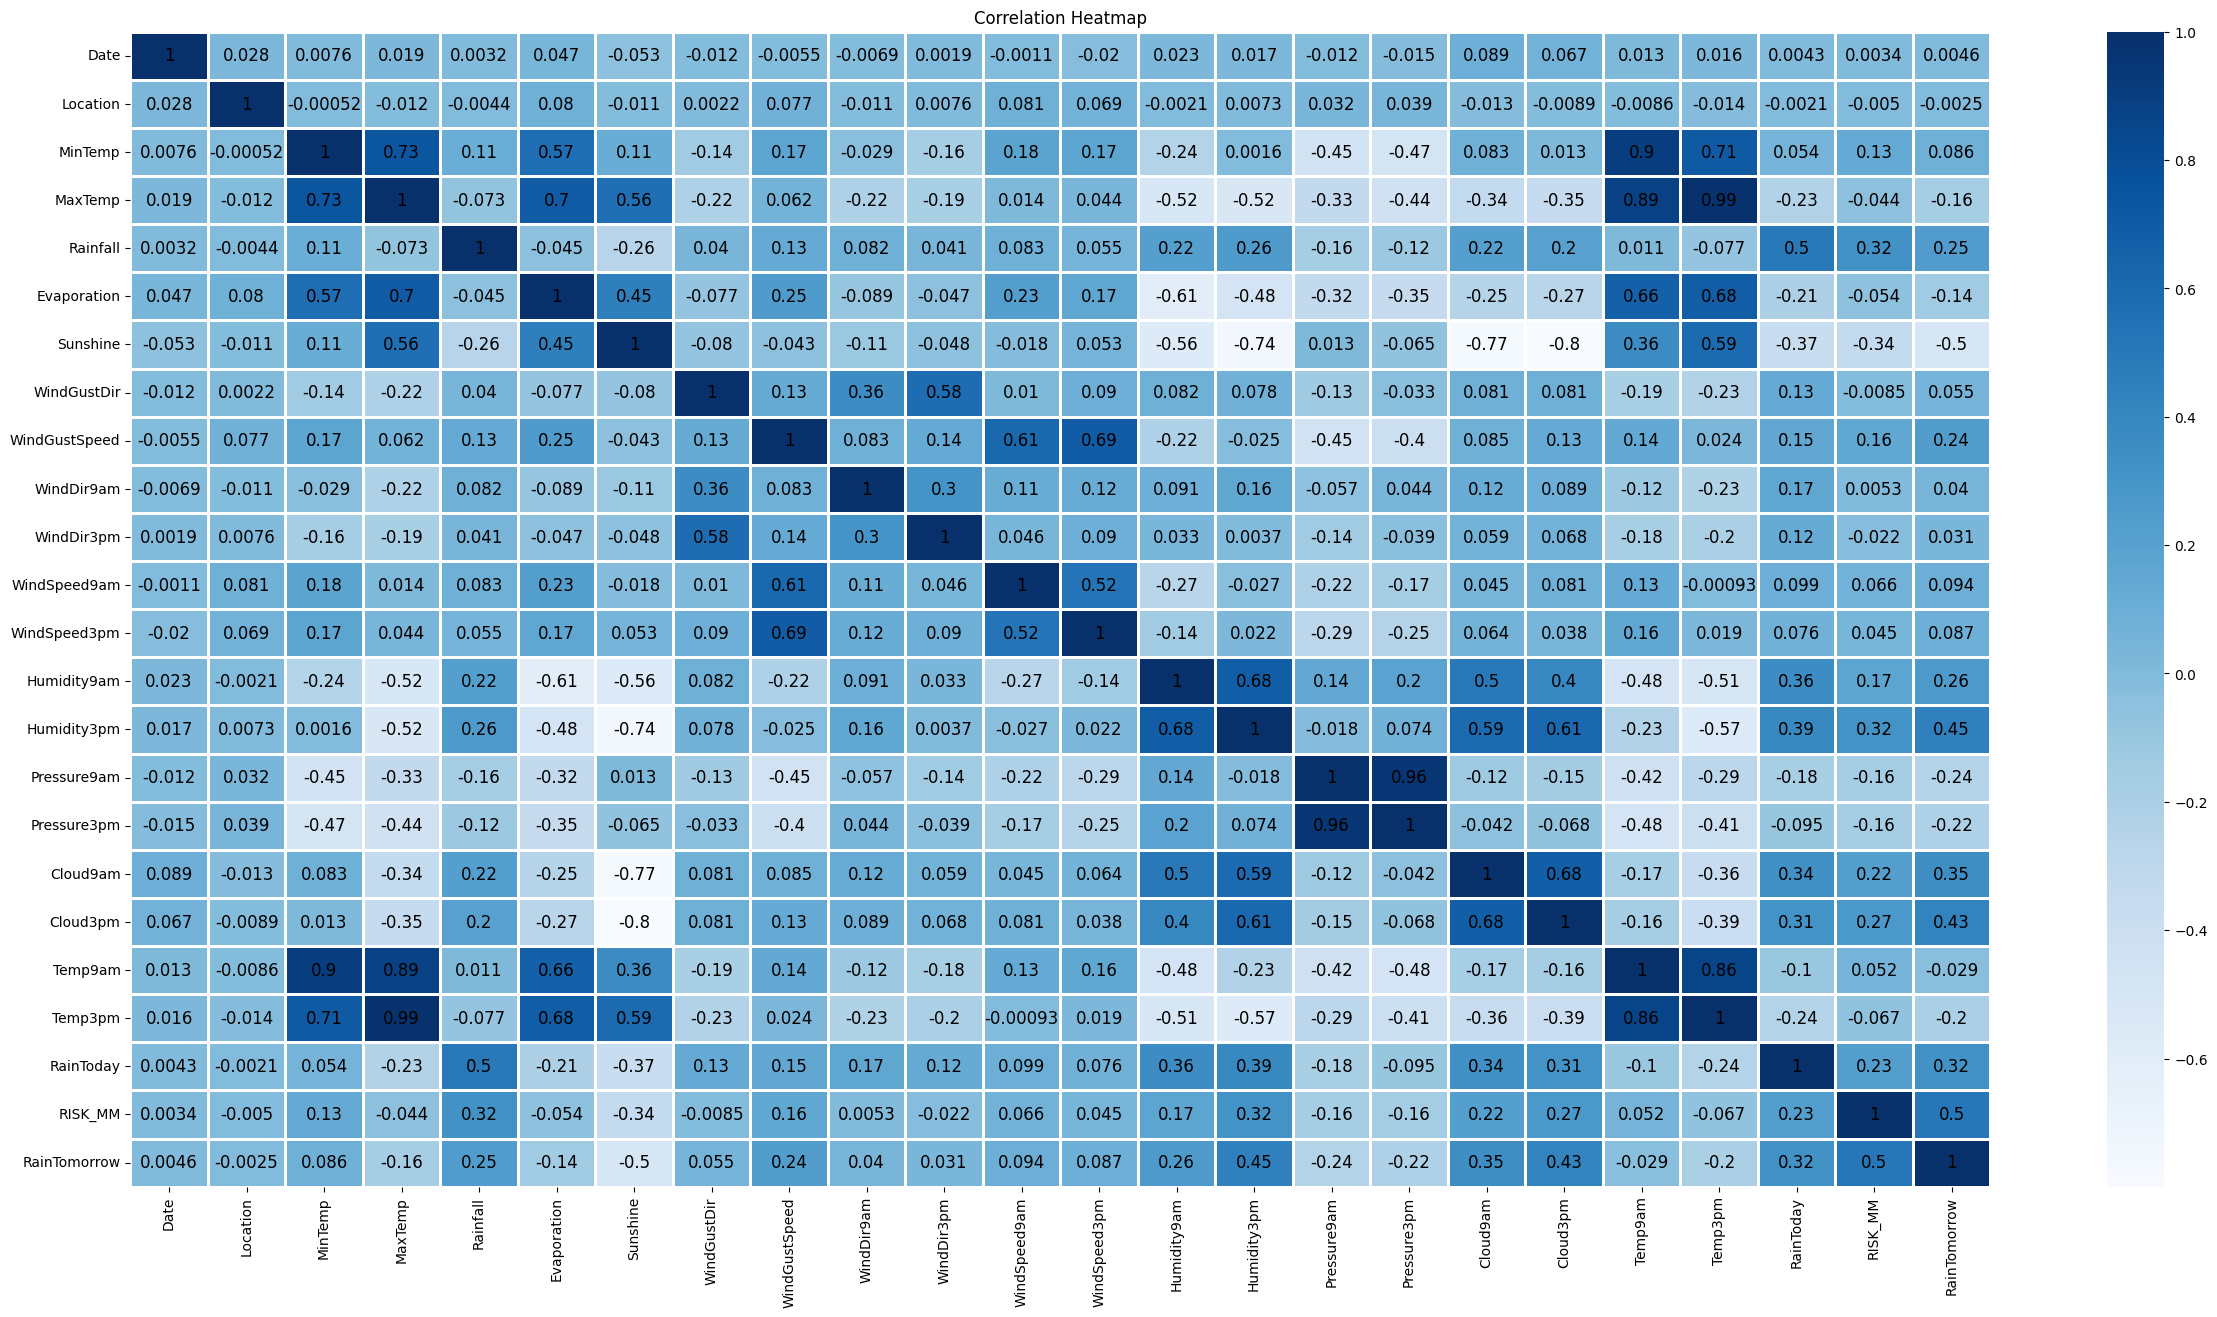

In [27]:
plt.figure(figsize=(30,15))
sns.heatmap(final_df.corr(),cmap='Blues',annot=True,linewidths=1,annot_kws={"fontsize":12,"color":"black"})
plt.title('Correlation Heatmap')
plt.show()

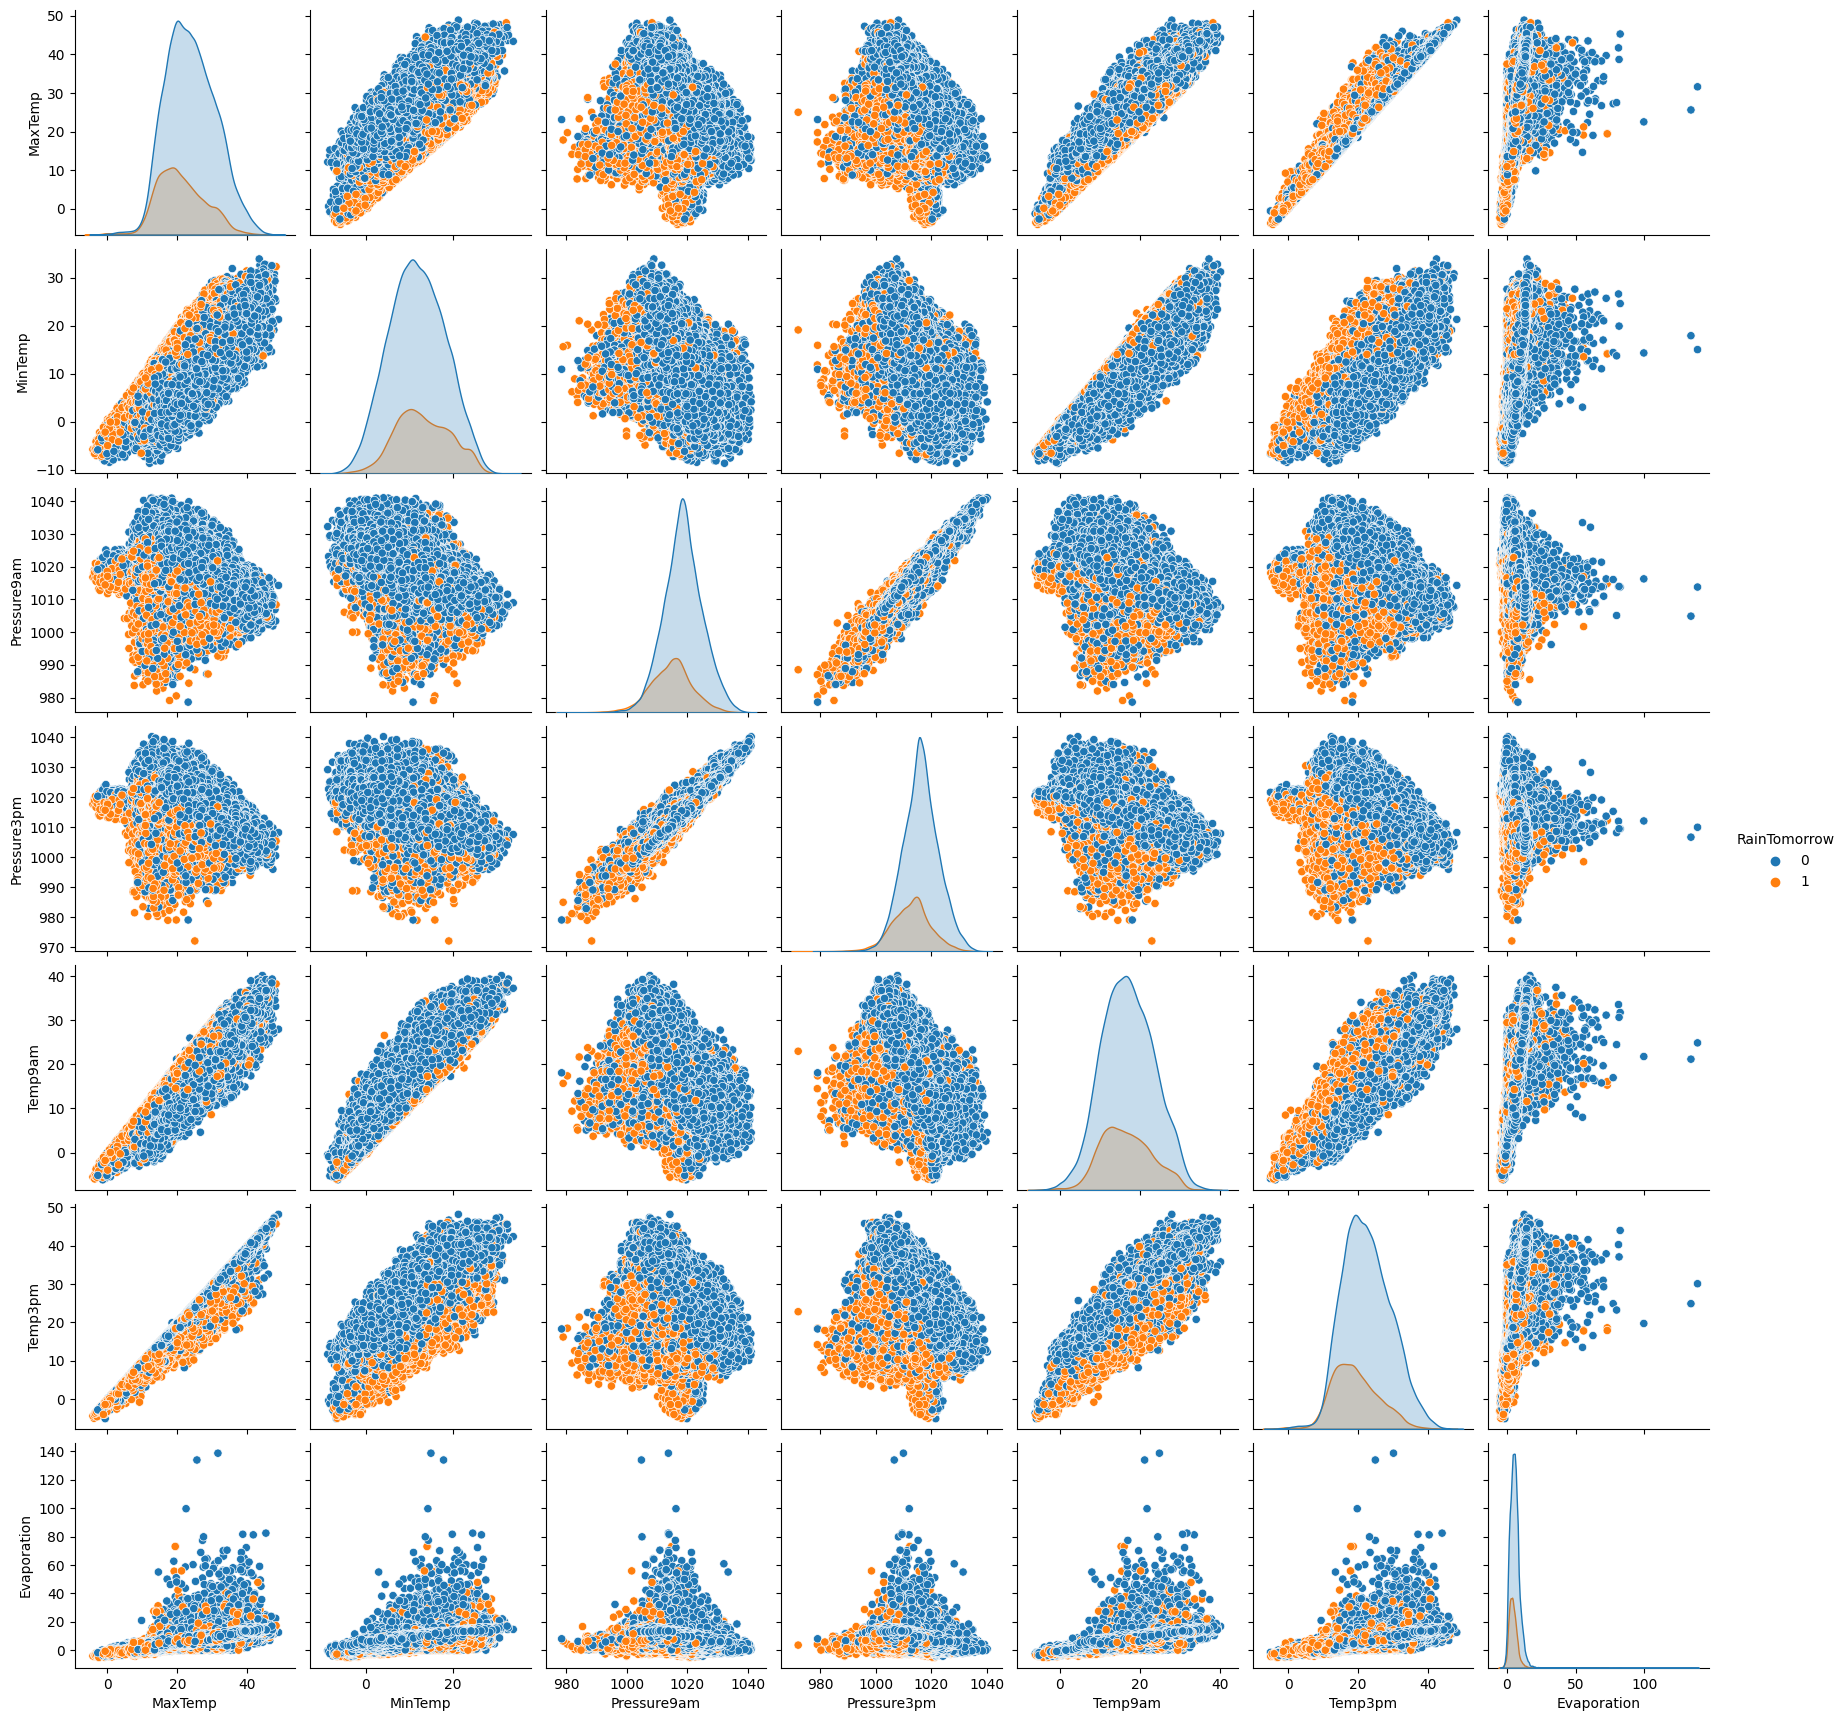

In [105]:
sns.pairplot( data=final_df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

In [28]:
high_correlation_pairs = []
for i in range(len(final_df.corr().columns)):
    for j in range(i+1, len(final_df.corr().columns)):
        if abs(final_df.corr().iloc[i, j]) > 0.7:
            pair = (final_df.corr().columns[i], final_df.corr().columns[j])
            high_correlation_pairs.append(pair)
high_correlation_pairs

[('MinTemp', 'MaxTemp'),
 ('MinTemp', 'Temp9am'),
 ('MinTemp', 'Temp3pm'),
 ('MaxTemp', 'Evaporation'),
 ('MaxTemp', 'Temp9am'),
 ('MaxTemp', 'Temp3pm'),
 ('Sunshine', 'Humidity3pm'),
 ('Sunshine', 'Cloud9am'),
 ('Sunshine', 'Cloud3pm'),
 ('Pressure9am', 'Pressure3pm'),
 ('Temp9am', 'Temp3pm')]

In [29]:
high_correlation_list = list(set([value for pair in high_correlation_pairs for value in pair]))
high_correlation_list

['Cloud3pm',
 'Temp9am',
 'Humidity3pm',
 'Evaporation',
 'Cloud9am',
 'Pressure3pm',
 'Pressure9am',
 'Sunshine',
 'MaxTemp',
 'MinTemp',
 'Temp3pm']

In [30]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(final_df)
modified_data = pd.DataFrame(r_scaler.transform(final_df), index=final_df.index, columns=final_df.columns)

In [31]:
# Feature Selection using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.drop('RainTomorrow',axis =1)
Y = modified_data['RainTomorrow']
selector = SelectKBest(chi2, k=5)
selector.fit(X, Y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity3pm', 'Cloud3pm', 'RainToday', 'RISK_MM'], dtype='object')


In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = final_df.drop('RainTomorrow', axis=1)
y = final_df['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'RISK_MM']
[0.00180724 0.00186402 0.00259142 0.00312987 0.01725034 0.00236565
 0.07010219 0.00114373 0.00893919 0.0012962  0.00125008 0.00134645
 0.00174368 0.00821101 0.04120405 0.00709118 0.01246638 0.01820583
 0.0326959  0.00258474 0.00398769 0.00784848 0.75087469]


In [33]:
X = final_df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
Y = final_df['RainTomorrow']

In [34]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=12345)



In [35]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='darkblue', label='ROC')
    plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [37]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print()
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8654953322476318
ROC Area under Curve = 0.761661285714115
Cohen's Kappa = 0.5706412591553385
Time taken = 4.979316234588623

              precision    recall  f1-score   support

           0    0.88889   0.94614   0.91662     34068
           1    0.74983   0.57719   0.65228      9529

    accuracy                        0.86550     43597
   macro avg    0.81936   0.76166   0.78445     43597
weighted avg    0.85850   0.86550   0.85884     43597



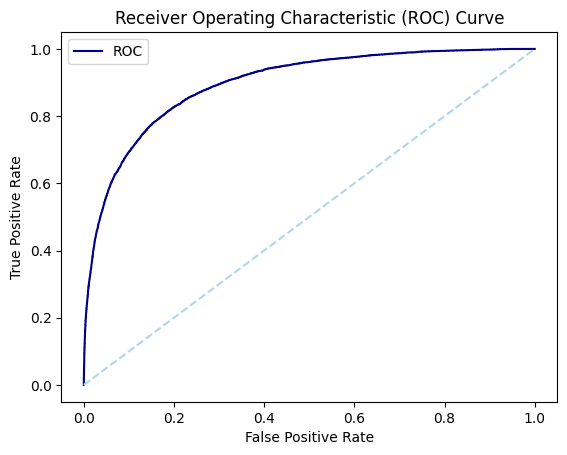

In [38]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)


Accuracy = 0.8467325733422024
ROC Area under Curve = 0.7533219875090583
Cohen's Kappa = 0.5303359601842088
Time taken = 0.7384529113769531

              precision    recall  f1-score   support

           0    0.88845   0.91928   0.90360     34068
           1    0.67054   0.58736   0.62620      9529

    accuracy                        0.84673     43597
   macro avg    0.77950   0.75332   0.76490     43597
weighted avg    0.84082   0.84673   0.84297     43597



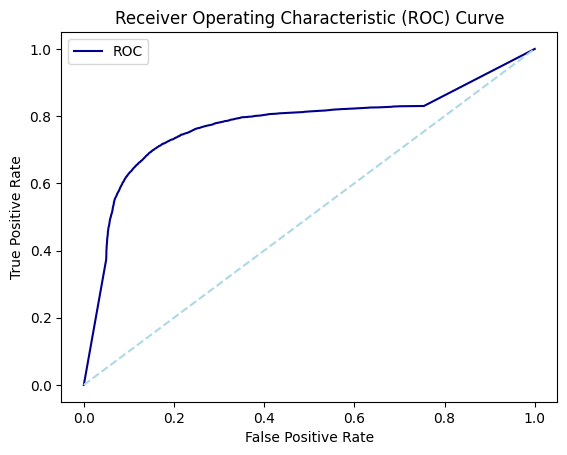

In [39]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8916209830951671
ROC Area under Curve = 0.797917802330312
Cohen's Kappa = 0.6525346073984779
Time taken = 47.27401924133301

              precision    recall  f1-score   support

           0    0.90343   0.96439   0.93292     34068
           1    0.83223   0.63144   0.71806      9529

    accuracy                        0.89162     43597
   macro avg    0.86783   0.79792   0.82549     43597
weighted avg    0.88787   0.89162   0.88596     43597



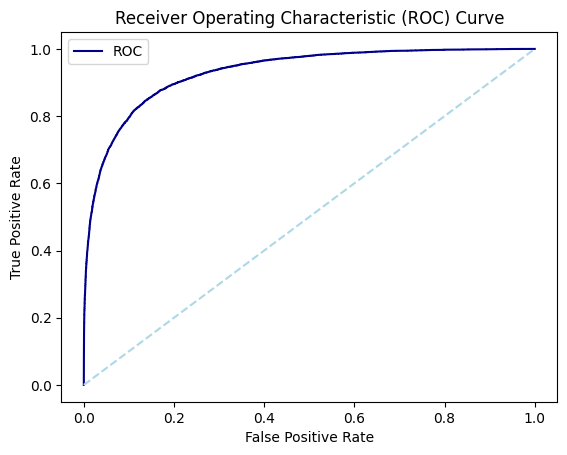

In [40]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.892790788356997
ROC Area under Curve = 0.8250093323566271
Cohen's Kappa = 0.6743854934829441
Time taken = 156.06664395332336

              precision    recall  f1-score   support

           0    0.91963   0.94543   0.93235     34068
           1    0.78316   0.70459   0.74180      9529

    accuracy                        0.89279     43597
   macro avg    0.85139   0.82501   0.83707     43597
weighted avg    0.88980   0.89279   0.89070     43597



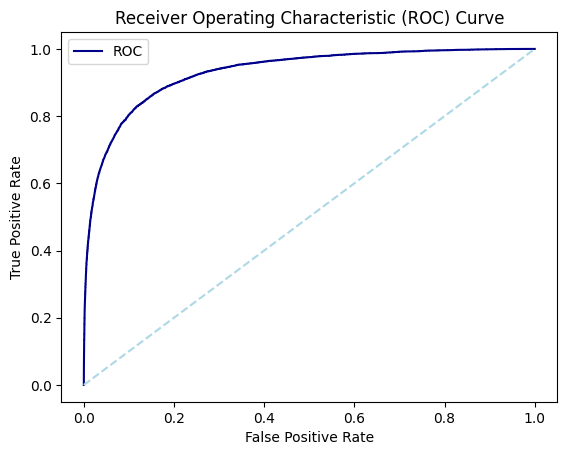

In [41]:
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

Accuracy = 0.9149482762575406
ROC Area under Curve = 0.8532843475790021
Cohen's Kappa = 0.739434156195528
Time taken = 173.16212129592896

              precision    recall  f1-score   support

           0    0.93071   0.96284   0.94650     34068
           1    0.84844   0.74373   0.79264      9529

    accuracy                        0.91495     43597
   macro avg    0.88957   0.85328   0.86957     43597
weighted avg    0.91273   0.91495   0.91287     43597



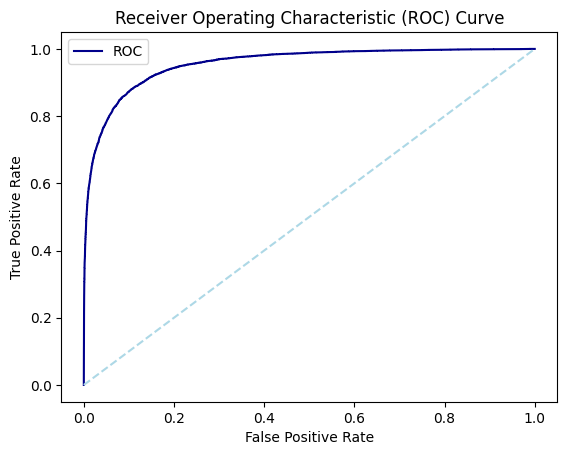

In [43]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

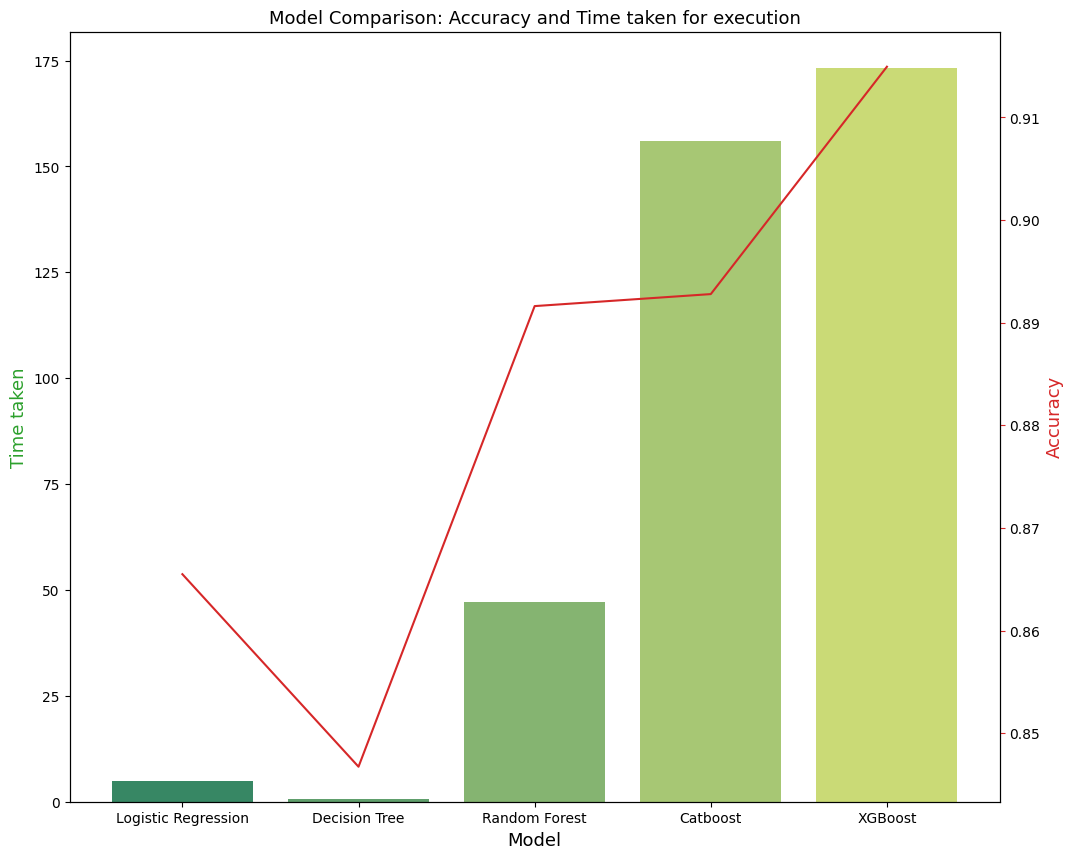

In [44]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

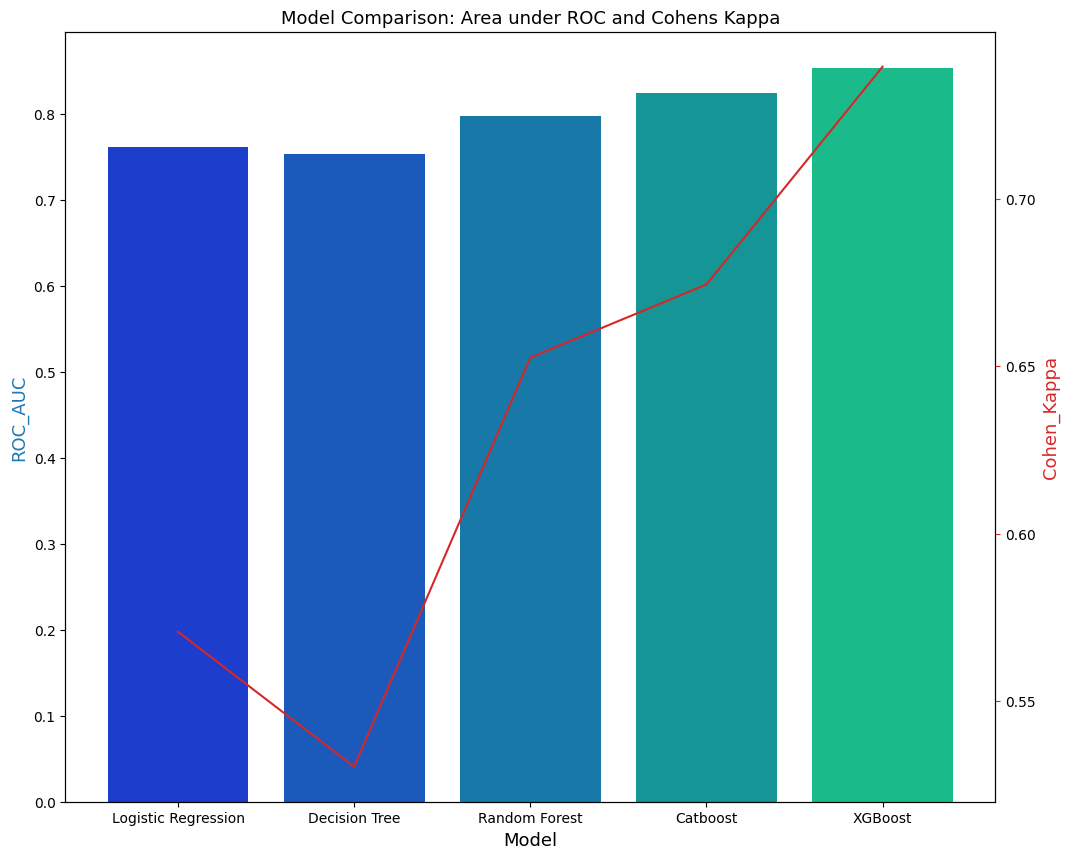

In [45]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [77]:
# Load the pickled model
import pickle
with open('model.pkl', 'wb') as model:
    loaded_model = pickle.dump(model_xgb,model)